# Rudimentary scaling studies

In [1]:
import minterpy as mp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def runge(xx):
    return 1 / (1 + np.sum(xx**2, axis=1))

In [3]:
len(mp.MultiIndexSet.from_degree(5, 6, np.inf))

16807

In [4]:
spatial_dimensions = [2, 3, 4, 5]
poly_degrees = [1, 2, 3, 4, 5, 6]
lp_degrees = [1.0, 2.0, np.inf]
num_query = 500000

In [5]:
timing = np.empty((len(poly_degrees), len(lp_degrees), len(spatial_dimensions)))

In [6]:
for k, m in enumerate(spatial_dimensions):
    xx_test = -1 + 2 * np.random.rand(num_query, m)
    print(f"Dimension: {k} ---")
    for j, p in enumerate(lp_degrees):
        for i, n in enumerate(poly_degrees):
            my_poly = mp.interpolate(runge, m, n, p)
            eval_timing = %timeit -o my_poly(xx_test)
            timing[i, j, k] = eval_timing.average

Dimension: 0 ---
11.2 ms ± 84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.6 ms ± 859 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.4 ms ± 954 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
33.2 ms ± 889 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
42.9 ms ± 978 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
55.3 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.1 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.6 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.6 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
36.2 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.2 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
66.4 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.5 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.8 ms ± 737 µs per loop (mean ± std. dev. of 7 runs, 10 loops e

In [7]:
np.save("timing-long", timing)

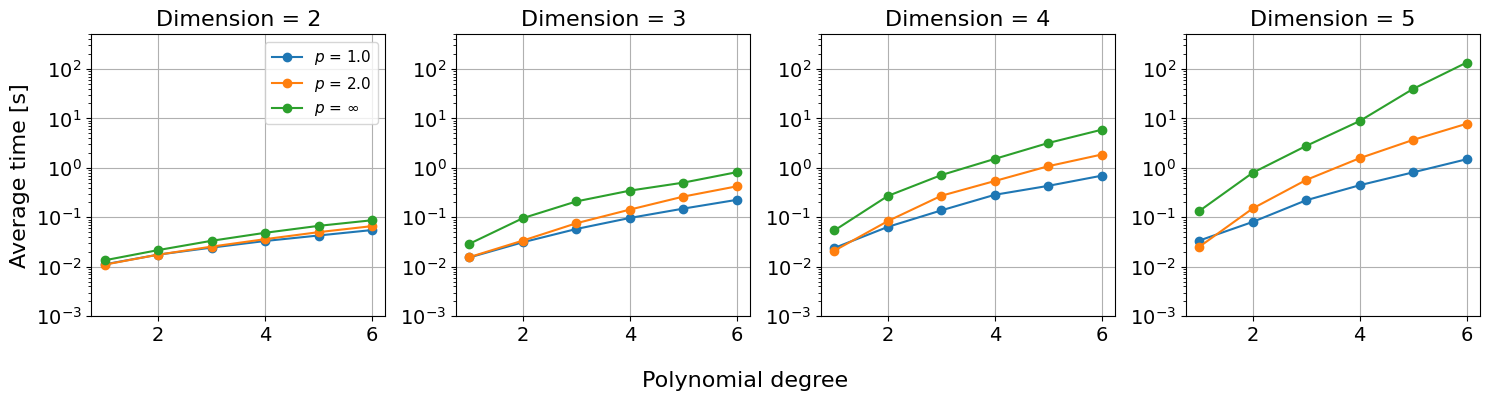

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

lp_degrees_str = ["$1.0$", "$2.0$", "$\infty$"]
title_fontsize = 16
ticklabel_fontsize = 14
ylabel_fontsize = 16
legend_fontsize = 11

# --- Dimension 1
for k, m in enumerate(spatial_dimensions):
    for j, p in enumerate(lp_degrees_str):
        axs[k].plot(poly_degrees, timing[:, j, k], marker="o", label=rf"$p$ = {p}")
    axs[k].set_yscale("log")
    axs[k].set_title(f"Dimension = {m}", fontsize=title_fontsize)
    axs[k].set_ylim([1e-3, 5e2])
    axs[k].tick_params(axis="both", which="major", labelsize=ticklabel_fontsize)
    axs[k].grid()
axs[0].set_ylabel("Average time [s]", fontsize=ylabel_fontsize)
axs[0].legend(fontsize=legend_fontsize)

fig.supxlabel("Polynomial degree", fontsize=ylabel_fontsize)

fig.tight_layout()
plt.savefig("timing.png", dpi=600)

In [10]:
mi_size = np.empty((len(poly_degrees), len(lp_degrees), len(spatial_dimensions)))

In [11]:
for k, m in enumerate(spatial_dimensions):
    for j, p in enumerate(lp_degrees):
        for i, n in enumerate(poly_degrees):
            mi = mp.MultiIndexSet.from_degree(m, n, p)
            mi_size[i, j, k] = len(mi)

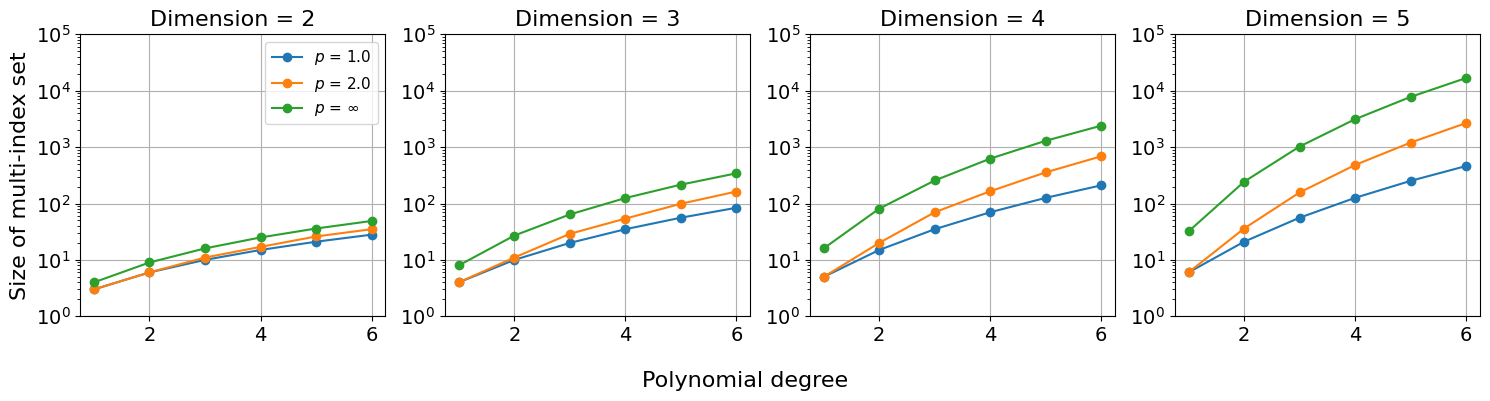

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

lp_degrees_str = ["$1.0$", "$2.0$", "$\infty$"]
title_fontsize = 16
ticklabel_fontsize = 14
ylabel_fontsize = 16
legend_fontsize = 11

# --- Dimension 1
for k, m in enumerate(spatial_dimensions):
    for j, p in enumerate(lp_degrees_str):
        axs[k].plot(poly_degrees, mi_size[:, j, k], marker="o", label=rf"$p$ = {p}")
    axs[k].set_yscale("log")
    axs[k].set_title(f"Dimension = {m}", fontsize=title_fontsize)
    axs[k].set_ylim([1e0, 1e5])
    axs[k].tick_params(axis="both", which="major", labelsize=ticklabel_fontsize)
    axs[k].grid()
axs[0].set_ylabel("Size of multi-index set", fontsize=ylabel_fontsize)
axs[0].legend(fontsize=legend_fontsize)

fig.supxlabel("Polynomial degree", fontsize=ylabel_fontsize)

fig.tight_layout()
plt.savefig("mi-size.png", dpi=600)